In [31]:
import pandas as pd
import numpy as np

In [32]:
data = pd.read_csv('Sales_data_zone_wise.csv')
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [33]:
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

# ● The mean sales generated by each zone

In [34]:
print('Zone - A Mean:',data.groupby('Month')['Zone - A'].mean().mean())
print('Zone - B Mean:',data.groupby('Month')['Zone - B'].mean().mean())
print('Zone - C Mean:',data.groupby('Month')['Zone - C'].mean().mean())
print('Zone - D Mean:',data.groupby('Month')['Zone - D'].mean().mean())

Zone - A Mean: 1540493.1379310344
Zone - B Mean: 1755559.5862068965
Zone - C Mean: 1772871.0344827587
Zone - D Mean: 1842926.7586206896


# ● Total sales generated by all the zones for each month.

In [36]:
data1=data.groupby('Month')[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum(1).sum(axis=1)
data1.sort_values()

Month
Month - 13    5925424
Month - 15    5934156
Month - 5     5995328
Month - 25    6095918
Month - 12    6111084
Month - 27    6267918
Month - 3     6475939
Month - 16    6506659
Month - 26    6512360
Month - 23    6687919
Month - 9     6703395
Month - 29    6772277
Month - 19    6971953
Month - 1     7022544
Month - 11    7032783
Month - 18    7083490
Month - 20    7124599
Month - 10    7128210
Month - 17    7149383
Month - 6     7151387
Month - 2     7152303
Month - 14    7155515
Month - 7     7287108
Month - 21    7389597
Month - 28    7470920
Month - 22    7560001
Month - 24    7784747
Month - 8     7816299
Month - 4     8174449
dtype: int64

# ● Check whether all the zones generate the same amount of sales.

In [9]:
from scipy.stats import f_oneway
#H0 = All the Zones generate same amount of sales.
#H1 = All the Zones generate different amount of sales.

In [10]:
Zone_A=data['Zone - A']
Zone_B=data['Zone - B']
Zone_C=data['Zone - C']
Zone_D=data['Zone - D']
f_oneway(Zone_A,Zone_B,Zone_C,Zone_D)

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

In [16]:
import scipy.stats as stats
print(stats.shapiro(Zone_A))
print(stats.shapiro(Zone_B))
print(stats.shapiro(Zone_C))
print(stats.shapiro(Zone_D))

ShapiroResult(statistic=0.9369863271713257, pvalue=0.08361761271953583)
ShapiroResult(statistic=0.9357458353042603, pvalue=0.0776052474975586)
ShapiroResult(statistic=0.9428116083145142, pvalue=0.11880273371934891)
ShapiroResult(statistic=0.9255194664001465, pvalue=0.04216405004262924)


In [17]:
stats.levene(Zone_A,Zone_B,Zone_C,Zone_D,center='mean')

LeveneResult(statistic=7.9244570739320395, pvalue=7.702411853685584e-05)

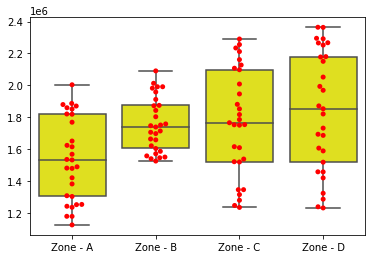

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']],color='yellow')
ax = sns.swarmplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']], color='red')
plt.show()

In [ ]:
# Anova one way anylasis p Value is less than 0.05 we reject the null hypotheis.
# and we take H1 'All the Zones generate different amount of sales.'